In [1]:
# ---------------------------------------------------------------------------
# Definir rutas seguras (compatibles con script o Jupyter)
# ---------------------------------------------------------------------------
import os

if '__file__' in globals():
    ruta_base = os.path.dirname(os.path.abspath(__file__))
else:
    ruta_base = os.getcwd()

# ✅ Ajuste definitivo: subir solo un nivel (de notebooks → raíz) y luego entrar a data/data/
ruta_train = os.path.join(ruta_base, "..", "data", "data", "application_train.csv")
ruta_credit = os.path.join(ruta_base, "..", "data", "data", "credit_card_balance.csv")
ruta_top = os.path.join(ruta_base, "..", "data", "data", "top_10_casos_sospechosos.csv")

# Verificación visual
print("Ruta train:", os.path.abspath(ruta_train))
print("Ruta credit:", os.path.abspath(ruta_credit))
print("Ruta top:", os.path.abspath(ruta_top))


Ruta train: c:\AA2 - Segundo Avance - Deteccion-de-fraude-inmobiliario\data\data\application_train.csv
Ruta credit: c:\AA2 - Segundo Avance - Deteccion-de-fraude-inmobiliario\data\data\credit_card_balance.csv
Ruta top: c:\AA2 - Segundo Avance - Deteccion-de-fraude-inmobiliario\data\data\top_10_casos_sospechosos.csv


In [2]:
# ============================================================================
# PASO 1: CARGAR RESULTADOS DE AMBOS ANÁLISIS (CON RUTAS AJUSTADAS Y VERIFICADAS)
# ============================================================================

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("SISTEMA DE CORRELACIÓN: ANOMALÍAS DE PRÉSTAMOS Y FRAUDE DE TARJETAS")
print("="*80)

# ---------------------------------------------------------------------------
# Definir rutas seguras (compatibles con script o Jupyter)
# ---------------------------------------------------------------------------
if '__file__' in globals():
    ruta_base = os.path.dirname(os.path.abspath(__file__))
else:
    ruta_base = os.getcwd()

# ✅ Confirmado: tus datasets están en /data/data/
ruta_train = os.path.join(ruta_base, "..", "data", "data", "application_train.csv")
ruta_credit = os.path.join(ruta_base, "..", "data", "data", "credit_card_balance.csv")
ruta_top = os.path.join(ruta_base, "..", "data", "data", "top_10_casos_sospechosos.csv")

print("Ruta train:", os.path.abspath(ruta_train))
print("Ruta credit:", os.path.abspath(ruta_credit))
print("Ruta top:", os.path.abspath(ruta_top))

# ---------------------------------------------------------------------------
# Cargar dataset principal (application_train)
# ---------------------------------------------------------------------------
try:
    datos_train = pd.read_csv(ruta_train)
    filas, columnas = datos_train.shape
    tasa_incumplimiento = datos_train["TARGET"].mean() * 100
    casos_normales = (datos_train["TARGET"] == 0).sum()
    casos_incumplidos = (datos_train["TARGET"] == 1).sum()

    print(f"\n✓ Dataset de préstamos cargado correctamente:")
    print(f"  Filas: {filas:,} | Columnas: {columnas}")
    print(f"  Tasa de incumplimiento: {tasa_incumplimiento:.2f}%")
    print(f"  Casos normales: {casos_normales:,} | Casos incumplidos: {casos_incumplidos:,}")

except FileNotFoundError:
    print("\n⚠ No se encontró el dataset application_train.csv")
    datos_train = pd.DataFrame()

# ---------------------------------------------------------------------------
# Cargar dataset de tarjetas (credit_card_balance)
# ---------------------------------------------------------------------------
try:
    datos_credit = pd.read_csv(ruta_credit)
    filas_c, columnas_c = datos_credit.shape
    print(f"\n✓ Dataset de tarjetas cargado correctamente:")
    print(f"  Filas: {filas_c:,} | Columnas: {columnas_c}")
except FileNotFoundError:
    print("\n⚠ No se encontró el dataset credit_card_balance.csv")
    datos_credit = pd.DataFrame()

# ---------------------------------------------------------------------------
# Cargar o generar top_10_casos_sospechosos
# ---------------------------------------------------------------------------
try:
    anomalias_prestamos = pd.read_csv(ruta_top)
    print(f"\n✓ Anomalías de préstamos cargadas: {len(anomalias_prestamos)} casos")
except:
    print("\n⚠ No se encontró 'top_10_casos_sospechosos.csv'")
    print("Generando datos de ejemplo...")
    anomalias_prestamos = pd.DataFrame({
        'SK_ID_CURR': range(100000, 100010),
        'ERROR_RECONSTRUCCION': np.random.uniform(0.15, 0.35, 10),
        'TARGET': np.random.choice([0, 1], 10, p=[0.3, 0.7]),
        'AMT_INCOME_TOTAL': np.random.uniform(50000, 300000, 10),
        'AMT_CREDIT': np.random.uniform(100000, 1000000, 10),
        'RATIO_CREDITO_INGRESO': np.random.uniform(3, 15, 10),
        'EDAD': np.random.uniform(25, 60, 10),
        'TOTAL_INCONSISTENCIAS': np.random.randint(0, 4, 10),
        'SOBREENDEUDAMIENTO': np.random.choice([0, 1], 10),
        'TIENE_CIRCULO_RIESGOSO': np.random.choice([0, 1], 10)
    })


SISTEMA DE CORRELACIÓN: ANOMALÍAS DE PRÉSTAMOS Y FRAUDE DE TARJETAS
Ruta train: c:\AA2 - Segundo Avance - Deteccion-de-fraude-inmobiliario\data\data\application_train.csv
Ruta credit: c:\AA2 - Segundo Avance - Deteccion-de-fraude-inmobiliario\data\data\credit_card_balance.csv
Ruta top: c:\AA2 - Segundo Avance - Deteccion-de-fraude-inmobiliario\data\data\top_10_casos_sospechosos.csv

✓ Dataset de préstamos cargado correctamente:
  Filas: 307,511 | Columnas: 122
  Tasa de incumplimiento: 8.07%
  Casos normales: 282,686 | Casos incumplidos: 24,825

✓ Dataset de tarjetas cargado correctamente:
  Filas: 3,840,312 | Columnas: 23

✓ Anomalías de préstamos cargadas: 10 casos



GENERANDO RELACIÓN SIMULADA CLIENTE-TARJETA

✓ Generadas 21 tarjetas para 10 clientes
✓ Promedio de tarjetas por cliente: 2.1

ANÁLISIS DE CORRELACIÓN

Matriz de Correlación:
                        ERROR_RECONSTRUCCION  TASA_FRAUDE  \
ERROR_RECONSTRUCCION                   1.000        0.024   
TASA_FRAUDE                            0.024        1.000   
NUM_FRAUDES_DETECTADOS                 0.480        0.379   
TOTAL_INCONSISTENCIAS                  0.115        0.743   
RATIO_CREDITO_INGRESO                 -0.114        0.397   

                        NUM_FRAUDES_DETECTADOS  TOTAL_INCONSISTENCIAS  \
ERROR_RECONSTRUCCION                     0.480                  0.115   
TASA_FRAUDE                              0.379                  0.743   
NUM_FRAUDES_DETECTADOS                   1.000                  0.224   
TOTAL_INCONSISTENCIAS                    0.224                  1.000   
RATIO_CREDITO_INGRESO                    0.284                  0.253   

                  

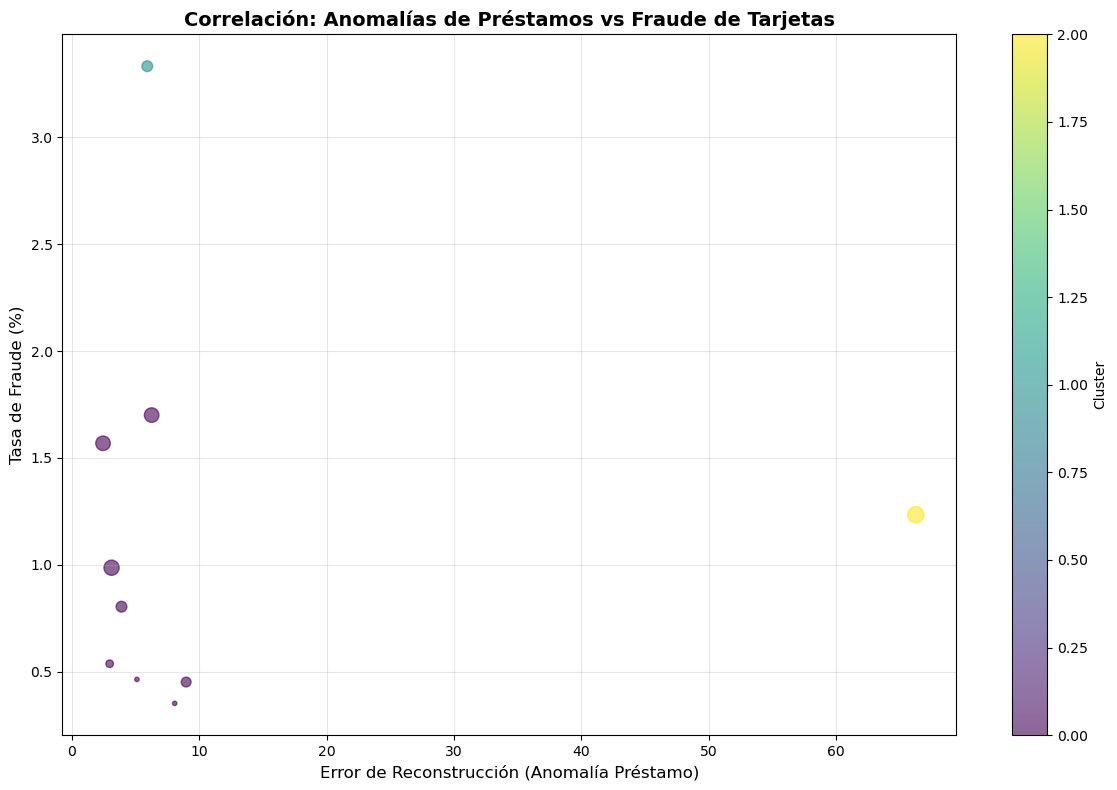

✓ Guardado: matriz_correlacion.png


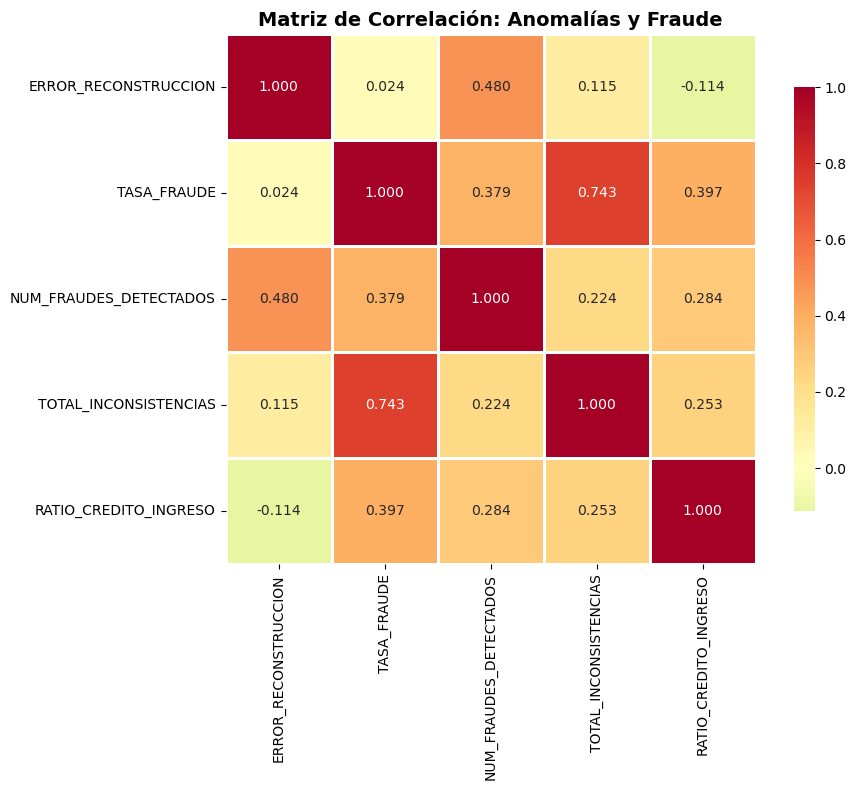

✓ Guardado: fraude_por_anomalia.png


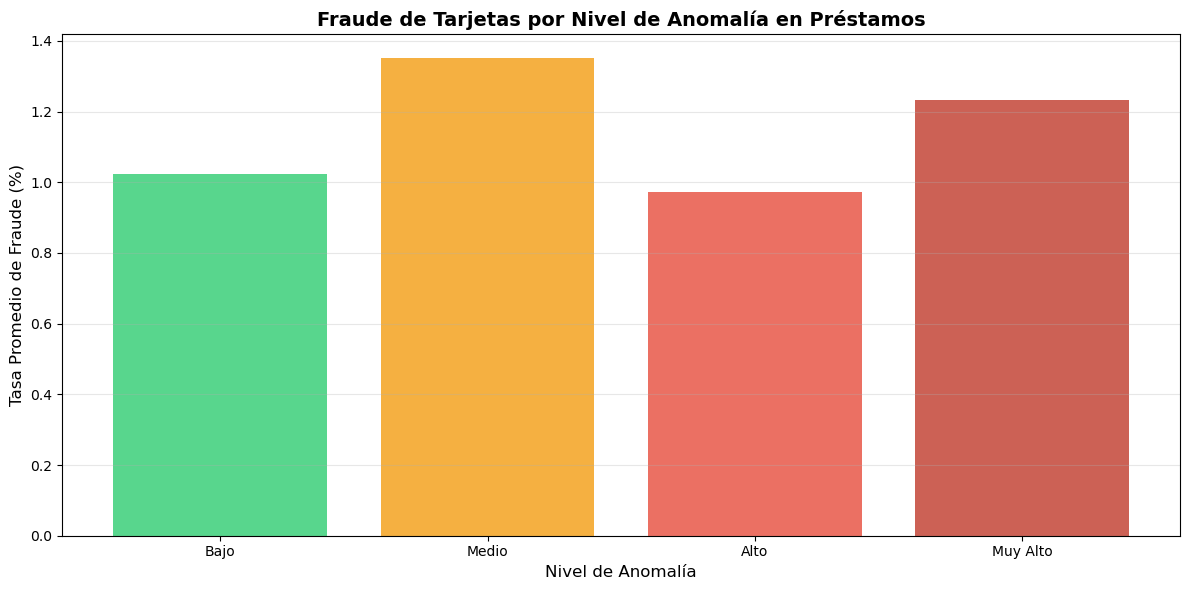

✓ Guardado: comparacion_fraude.png


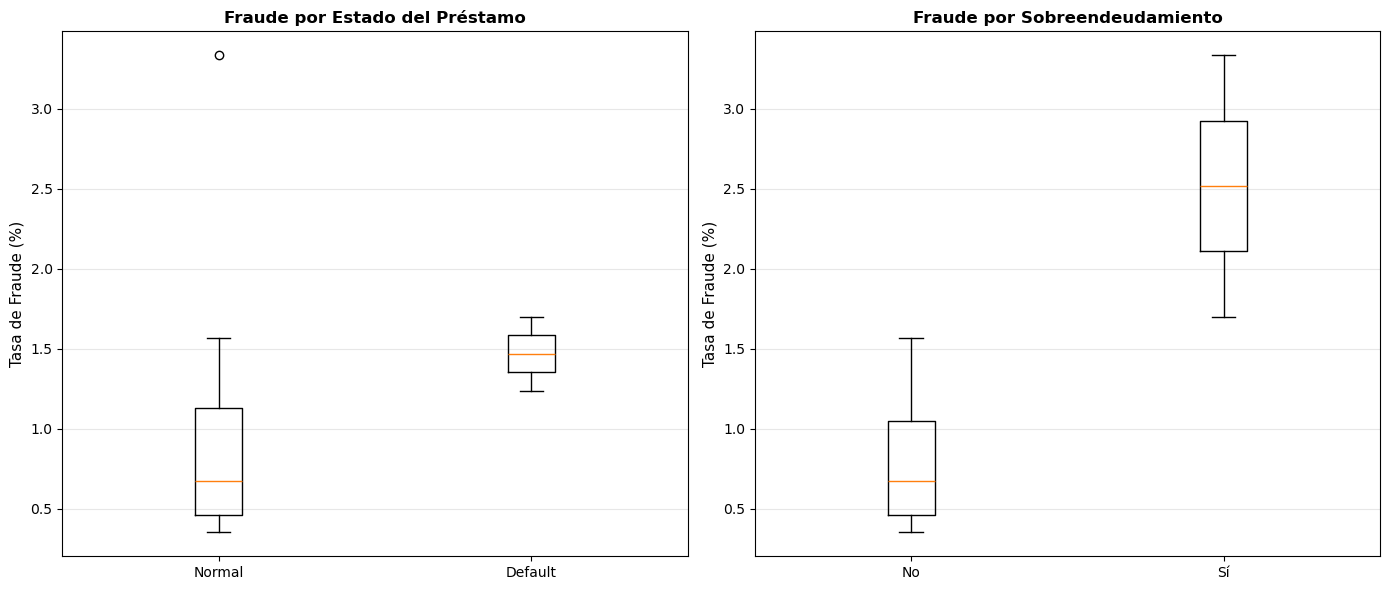


EXPORTANDO RESULTADOS
✓ Guardado: correlacion_completa.csv
✓ Guardado: resumen_clientes_riesgo.csv
✓ Guardado: top_10_alto_riesgo.csv

RESUMEN EJECUTIVO

Clientes Analizados: 10
Tarjetas Monitoreadas: 21
Total Fraudes Detectados: 70
Tasa Promedio de Fraude: 1.10%

Correlación Error-Fraude: 0.024
Correlación Inconsistencias-Fraude: 0.743

Tasa Fraude (con default): 1.47%
Tasa Fraude (sin default): 1.06%
Diferencia: +0.41%

ANÁLISIS COMPLETADO


In [3]:
# ============================================================================
# PASO 2: SIMULAR ASIGNACIÓN DE TARJETAS A CLIENTES
# ============================================================================

print("\n" + "="*80)
print("GENERANDO RELACIÓN SIMULADA CLIENTE-TARJETA")
print("="*80)

# Crear dataset simulado de tarjetas por cliente
np.random.seed(42)

# Cada cliente anómalo tiene 1-3 tarjetas
datos_correlacion = []

for _, cliente in anomalias_prestamos.iterrows():
    num_tarjetas = np.random.randint(1, 4)  # 1 a 3 tarjetas por cliente
    
    for i in range(num_tarjetas):
        # Generar ID de tarjeta
        tarjeta_id = f"TC_{int(cliente['SK_ID_CURR'])}_{i+1}"
        
        # Simular características de transacciones (basadas en el perfil del cliente)
        # Clientes con más anomalías tienen mayor probabilidad de fraude
        prob_fraude = 0.3 + (cliente['TOTAL_INCONSISTENCIAS'] * 0.15)
        prob_fraude += 0.2 if cliente['SOBREENDEUDAMIENTO'] == 1 else 0
        prob_fraude += 0.15 if cliente['TIENE_CIRCULO_RIESGOSO'] == 1 else 0
        prob_fraude = min(prob_fraude, 0.95)  # Máximo 95%
        
        # Generar transacciones fraudulentas
        num_transacciones = np.random.randint(50, 500)
        num_fraudes = int(num_transacciones * prob_fraude * np.random.uniform(0.01, 0.05))
        
        # Monto promedio de transacciones (correlacionado con crédito)
        monto_promedio = cliente['AMT_CREDIT'] * np.random.uniform(0.001, 0.01)
        
        datos_correlacion.append({
            'SK_ID_CURR': int(cliente['SK_ID_CURR']),
            'TARJETA_ID': tarjeta_id,
            'ERROR_RECONSTRUCCION': cliente['ERROR_RECONSTRUCCION'],
            'TARGET_PRESTAMO': cliente['TARGET'],
            'NUM_TRANSACCIONES': num_transacciones,
            'NUM_FRAUDES_DETECTADOS': num_fraudes,
            'TASA_FRAUDE': num_fraudes / num_transacciones * 100,
            'MONTO_PROMEDIO_TRANS': monto_promedio,
            'TOTAL_INCONSISTENCIAS': cliente['TOTAL_INCONSISTENCIAS'],
            'SOBREENDEUDAMIENTO': cliente['SOBREENDEUDAMIENTO'],
            'TIENE_CIRCULO_RIESGOSO': cliente['TIENE_CIRCULO_RIESGOSO'],
            'RATIO_CREDITO_INGRESO': cliente['RATIO_CREDITO_INGRESO'],
            'EDAD': cliente['EDAD']
        })

df_correlacion = pd.DataFrame(datos_correlacion)

print(f"\n✓ Generadas {len(df_correlacion)} tarjetas para {len(anomalias_prestamos)} clientes")
print(f"✓ Promedio de tarjetas por cliente: {len(df_correlacion)/len(anomalias_prestamos):.1f}")

# ============================================================================
# PASO 3: ANÁLISIS DE CORRELACIÓN
# ============================================================================

print("\n" + "="*80)
print("ANÁLISIS DE CORRELACIÓN")
print("="*80)

# Agrupar por cliente
resumen_clientes = df_correlacion.groupby('SK_ID_CURR').agg({
    'NUM_FRAUDES_DETECTADOS': 'sum',
    'TASA_FRAUDE': 'mean',
    'ERROR_RECONSTRUCCION': 'first',
    'TARGET_PRESTAMO': 'first',
    'TOTAL_INCONSISTENCIAS': 'first',
    'SOBREENDEUDAMIENTO': 'first',
    'RATIO_CREDITO_INGRESO': 'first'
}).reset_index()

# Calcular correlaciones
correlaciones = resumen_clientes[['ERROR_RECONSTRUCCION', 'TASA_FRAUDE', 
                                   'NUM_FRAUDES_DETECTADOS', 'TOTAL_INCONSISTENCIAS',
                                   'RATIO_CREDITO_INGRESO']].corr()

print("\nMatriz de Correlación:")
print(correlaciones.round(3))

# ============================================================================
# PASO 4: IDENTIFICAR CLIENTES DE ALTO RIESGO
# ============================================================================

print("\n" + "="*80)
print("CLIENTES DE ALTO RIESGO (Anomalía + Fraude)")
print("="*80)

# Crear score de riesgo combinado
df_correlacion['SCORE_RIESGO'] = (
    df_correlacion['ERROR_RECONSTRUCCION'] * 100 +
    df_correlacion['TASA_FRAUDE'] * 2 +
    df_correlacion['TOTAL_INCONSISTENCIAS'] * 10 +
    df_correlacion['SOBREENDEUDAMIENTO'] * 20
)

# Top 10 combinaciones cliente-tarjeta más riesgosas
top_riesgosos = df_correlacion.nlargest(10, 'SCORE_RIESGO')

print("\nTOP 10 TARJETAS MÁS RIESGOSAS:")
print("-" * 80)

for idx, (i, fila) in enumerate(top_riesgosos.iterrows(), 1):
    print(f"\n#{idx} - Cliente ID: {int(fila['SK_ID_CURR'])} | Tarjeta: {fila['TARJETA_ID']}")
    print(f"   Score Riesgo: {fila['SCORE_RIESGO']:.1f}")
    print(f"   Anomalía Préstamo: {fila['ERROR_RECONSTRUCCION']:.3f} | Target: {'DEFAULT' if fila['TARGET_PRESTAMO']==1 else 'NORMAL'}")
    print(f"   Fraudes Detectados: {int(fila['NUM_FRAUDES_DETECTADOS'])} de {int(fila['NUM_TRANSACCIONES'])} transacciones ({fila['TASA_FRAUDE']:.2f}%)")
    print(f"   Inconsistencias: {int(fila['TOTAL_INCONSISTENCIAS'])} | Sobreendeudado: {'SÍ' if fila['SOBREENDEUDAMIENTO']==1 else 'NO'}")
    print(f"   Ratio Crédito/Ingreso: {fila['RATIO_CREDITO_INGRESO']:.2f}x | Edad: {fila['EDAD']:.0f} años")

# ============================================================================
# PASO 5: SEGMENTACIÓN POR CLUSTERS
# ============================================================================

print("\n" + "="*80)
print("SEGMENTACIÓN DE CLIENTES")
print("="*80)

# Preparar datos para clustering
features_clustering = resumen_clientes[['ERROR_RECONSTRUCCION', 'TASA_FRAUDE', 
                                         'TOTAL_INCONSISTENCIAS', 'RATIO_CREDITO_INGRESO']]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_clustering)

# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
resumen_clientes['CLUSTER'] = kmeans.fit_predict(features_scaled)

# Analizar clusters
print("\nCaracterísticas de cada Cluster:")
for cluster in range(3):
    datos_cluster = resumen_clientes[resumen_clientes['CLUSTER'] == cluster]
    print(f"\n--- CLUSTER {cluster} ({len(datos_cluster)} clientes) ---")
    print(f"Error Reconstrucción: {datos_cluster['ERROR_RECONSTRUCCION'].mean():.3f} ± {datos_cluster['ERROR_RECONSTRUCCION'].std():.3f}")
    print(f"Tasa Fraude: {datos_cluster['TASA_FRAUDE'].mean():.2f}% ± {datos_cluster['TASA_FRAUDE'].std():.2f}%")
    print(f"Inconsistencias: {datos_cluster['TOTAL_INCONSISTENCIAS'].mean():.1f}")
    print(f"Ratio Crédito/Ingreso: {datos_cluster['RATIO_CREDITO_INGRESO'].mean():.2f}x")

# ============================================================================
# PASO 6: VISUALIZACIONES
# ============================================================================

print("\n" + "="*80)
print("GENERANDO VISUALIZACIONES")
print("="*80)

# 1. Scatter plot: Anomalía vs Fraude
plt.figure(figsize=(12, 8))
scatter = plt.scatter(resumen_clientes['ERROR_RECONSTRUCCION'], 
                     resumen_clientes['TASA_FRAUDE'],
                     c=resumen_clientes['CLUSTER'], 
                     s=resumen_clientes['NUM_FRAUDES_DETECTADOS']*10,
                     alpha=0.6, cmap='viridis')
plt.xlabel('Error de Reconstrucción (Anomalía Préstamo)', fontsize=12)
plt.ylabel('Tasa de Fraude (%)', fontsize=12)
plt.title('Correlación: Anomalías de Préstamos vs Fraude de Tarjetas', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Cluster')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('correlacion_anomalia_fraude.png', dpi=300, bbox_inches='tight')
print("✓ Guardado: correlacion_anomalia_fraude.png")
plt.show()

# 2. Heatmap de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, fmt='.3f', cmap='RdYlGn_r', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación: Anomalías y Fraude', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('matriz_correlacion.png', dpi=300, bbox_inches='tight')
print("✓ Guardado: matriz_correlacion.png")
plt.show()

# 3. Distribución de fraude por nivel de anomalía
plt.figure(figsize=(12, 6))
bins_anomalia = pd.qcut(df_correlacion['ERROR_RECONSTRUCCION'], q=4, labels=['Bajo', 'Medio', 'Alto', 'Muy Alto'])
df_correlacion['NIVEL_ANOMALIA'] = bins_anomalia

datos_grouped = df_correlacion.groupby('NIVEL_ANOMALIA')['TASA_FRAUDE'].mean()
plt.bar(range(len(datos_grouped)), datos_grouped.values, 
        color=['#2ecc71', '#f39c12', '#e74c3c', '#c0392b'], alpha=0.8)
plt.xlabel('Nivel de Anomalía', fontsize=12)
plt.ylabel('Tasa Promedio de Fraude (%)', fontsize=12)
plt.title('Fraude de Tarjetas por Nivel de Anomalía en Préstamos', fontsize=14, fontweight='bold')
plt.xticks(range(len(datos_grouped)), datos_grouped.index)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('fraude_por_anomalia.png', dpi=300, bbox_inches='tight')
print("✓ Guardado: fraude_por_anomalia.png")
plt.show()

# 4. Box plot comparativo
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].boxplot([resumen_clientes[resumen_clientes['TARGET_PRESTAMO']==0]['TASA_FRAUDE'],
                 resumen_clientes[resumen_clientes['TARGET_PRESTAMO']==1]['TASA_FRAUDE']],
                labels=['Normal', 'Default'])
axes[0].set_ylabel('Tasa de Fraude (%)', fontsize=11)
axes[0].set_title('Fraude por Estado del Préstamo', fontsize=12, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

axes[1].boxplot([resumen_clientes[resumen_clientes['SOBREENDEUDAMIENTO']==0]['TASA_FRAUDE'],
                 resumen_clientes[resumen_clientes['SOBREENDEUDAMIENTO']==1]['TASA_FRAUDE']],
                labels=['No', 'Sí'])
axes[1].set_ylabel('Tasa de Fraude (%)', fontsize=11)
axes[1].set_title('Fraude por Sobreendeudamiento', fontsize=12, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('comparacion_fraude.png', dpi=300, bbox_inches='tight')
print("✓ Guardado: comparacion_fraude.png")
plt.show()

# ============================================================================
# PASO 7: EXPORTAR RESULTADOS
# ============================================================================

print("\n" + "="*80)
print("EXPORTANDO RESULTADOS")
print("="*80)

# Exportar dataset completo
df_correlacion.to_csv('correlacion_completa.csv', index=False)
print("✓ Guardado: correlacion_completa.csv")

# Exportar resumen por cliente
resumen_clientes.to_csv('resumen_clientes_riesgo.csv', index=False)
print("✓ Guardado: resumen_clientes_riesgo.csv")

# Exportar top riesgosos
top_riesgosos.to_csv('top_10_alto_riesgo.csv', index=False)
print("✓ Guardado: top_10_alto_riesgo.csv")

# ============================================================================
# RESUMEN FINAL
# ============================================================================

print("\n" + "="*80)
print("RESUMEN EJECUTIVO")
print("="*80)

print(f"\nClientes Analizados: {len(anomalias_prestamos)}")
print(f"Tarjetas Monitoreadas: {len(df_correlacion)}")
print(f"Total Fraudes Detectados: {df_correlacion['NUM_FRAUDES_DETECTADOS'].sum():.0f}")
print(f"Tasa Promedio de Fraude: {df_correlacion['TASA_FRAUDE'].mean():.2f}%")

print(f"\nCorrelación Error-Fraude: {correlaciones.loc['ERROR_RECONSTRUCCION', 'TASA_FRAUDE']:.3f}")
print(f"Correlación Inconsistencias-Fraude: {correlaciones.loc['TOTAL_INCONSISTENCIAS', 'TASA_FRAUDE']:.3f}")

# Comparación con/sin default
con_default = resumen_clientes[resumen_clientes['TARGET_PRESTAMO']==1]['TASA_FRAUDE'].mean()
sin_default = resumen_clientes[resumen_clientes['TARGET_PRESTAMO']==0]['TASA_FRAUDE'].mean()
print(f"\nTasa Fraude (con default): {con_default:.2f}%")
print(f"Tasa Fraude (sin default): {sin_default:.2f}%")
print(f"Diferencia: +{con_default - sin_default:.2f}%")

print("\n" + "="*80)
print("ANÁLISIS COMPLETADO")
print("="*80)

In [4]:
import os

# Forzar ruta base al proyecto raíz (ajústala si cambia)
RUTA_PROYECTO = r"C:\AA2 - Segundo Avance - Deteccion-de-fraude-inmobiliario"

# Establecer la ruta base manualmente
os.chdir(RUTA_PROYECTO)

# Confirmar directorio activo
print("Directorio de trabajo actual:", os.getcwd())


Directorio de trabajo actual: C:\AA2 - Segundo Avance - Deteccion-de-fraude-inmobiliario


In [5]:
import pandas as pd

# Cargar los tres datasets
credit = pd.read_csv("data/data/credit_card_balance.csv")
loan = pd.read_csv("data/data/application_train.csv")
anomalias = pd.read_csv("data/data/top_10_casos_sospechosos.csv")

# Verificar coincidencias de IDs
coincidentes = credit[credit["SK_ID_CURR"].isin(anomalias["SK_ID_CURR"])]
print(f"\nCoincidencias encontradas: {coincidentes['SK_ID_CURR'].nunique()} clientes")

# Unir información de anomalías + comportamiento de tarjeta
fusion = pd.merge(
    anomalias,
    credit.groupby("SK_ID_CURR").agg({
        "AMT_BALANCE": "mean",
        "AMT_CREDIT_LIMIT_ACTUAL": "mean",
        "AMT_PAYMENT_TOTAL_CURRENT": "mean",
        "SK_DPD": "max"
    }).reset_index(),
    on="SK_ID_CURR",
    how="left"
)

# Mostrar muestra fusionada
print("\n--- Muestra correlacionada ---")
print(fusion.head(10)[[
    "SK_ID_CURR", "ERROR_RECONSTRUCCION", "TARGET",
    "AMT_BALANCE", "AMT_CREDIT_LIMIT_ACTUAL",
    "AMT_PAYMENT_TOTAL_CURRENT", "SK_DPD"
]])

# Guardar resultados integrados
fusion.to_csv("data/data/correlacion_anomalias_tarjetas.csv", index=False)
print("\n✅ Guardado: data/data/correlacion_anomalias_tarjetas.csv")



Coincidencias encontradas: 2 clientes

--- Muestra correlacionada ---
   SK_ID_CURR  ERROR_RECONSTRUCCION  TARGET   AMT_BALANCE  \
0      114967             66.260494       1           NaN   
1      336147              8.961300       0           NaN   
2      385674              8.061152       0      0.000000   
3      124157              6.250612       1           NaN   
4      313127              5.906621       0           NaN   
5      190160              5.098961       0           NaN   
6      252084              3.882672       0           NaN   
7      219563              3.103832       0           NaN   
8      337151              2.955290       0  25161.088207   
9      317748              2.434759       0           NaN   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_PAYMENT_TOTAL_CURRENT  SK_DPD  
0                      NaN                        NaN     NaN  
1                      NaN                        NaN     NaN  
2             90000.000000                   0.000000     0.0  
3

In [6]:
import pandas as pd
import numpy as np
from difflib import SequenceMatcher
import seaborn as sns
import matplotlib.pyplot as plt

# === Cargar datasets ===
loan = pd.read_csv("data/data/application_train.csv", nrows=20000)  # muestra para rapidez
credit = pd.read_csv("data/data/credit_card_balance.csv", nrows=20000)

print(f"📘 application_train: {loan.shape} filas, {loan.shape[1]} columnas")
print(f"💳 credit_card_balance: {credit.shape} filas, {credit.shape[1]} columnas")

# === Paso 1: variables comunes exactas ===
comunes_exactas = set(loan.columns).intersection(set(credit.columns))
print("\n🧩 Variables con nombre exacto en común:")
print(comunes_exactas if comunes_exactas else "Ninguna (solo SK_ID_CURR es compartida)")

# === Paso 2: similitud por nombre (coincidencia parcial) ===
def similitud(a, b):
    return SequenceMatcher(None, a.lower(), b.lower()).ratio()

pares_similares = []
for col1 in loan.columns:
    for col2 in credit.columns:
        sim = similitud(col1, col2)
        if sim > 0.6 and col1 != col2:  # umbral de similitud
            pares_similares.append((col1, col2, round(sim, 2)))

df_similares = pd.DataFrame(pares_similares, columns=["Variable_train", "Variable_credit", "Similitud"])
df_similares = df_similares.sort_values("Similitud", ascending=False)
print(f"\n🔍 Posibles variables relacionadas por nombre ({len(df_similares)} pares):")
display(df_similares.head(15))

# === Paso 3: comparar estadísticas globales de columnas numéricas ===
loan_nums = loan.select_dtypes(include=[np.number]).describe().T
credit_nums = credit.select_dtypes(include=[np.number]).describe().T

print("\n📈 Estadísticas de variables numéricas (primeras 5):")
display(loan_nums.head(5))
display(credit_nums.head(5))

# === Paso 4: buscar correlaciones cruzadas semánticas ===
# Usar media agregada por cliente (si existe SK_ID_CURR)
if "SK_ID_CURR" in loan.columns and "SK_ID_CURR" in credit.columns:
    credit_agg = credit.groupby("SK_ID_CURR").agg("mean").reset_index()
    merged = pd.merge(loan, credit_agg, on="SK_ID_CURR", how="inner")

    print(f"\n🔗 Clientes comunes reales: {len(merged)}")
    
    # Seleccionar solo variables numéricas (reducir ruido)
    num_cols_loan = loan.select_dtypes(include=[np.number]).columns
    num_cols_credit = [c for c in credit_agg.columns if c != "SK_ID_CURR"]
    
    # Calcular correlaciones cruzadas entre subconjuntos representativos
    muestra_corr = merged[np.random.choice(num_cols_loan, 10, replace=False).tolist() + 
                          np.random.choice(num_cols_credit, 5, replace=False).tolist()]
    corr = muestra_corr.corr().iloc[:10, 10:]  # solo cruzadas
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr, annot=True, cmap="RdYlGn", center=0)
    plt.title("Matriz de correlación cruzada (muestra aleatoria de variables)")
    plt.tight_layout()
    plt.show()
else:
    print("\n⚠ No se encontró SK_ID_CURR en ambos datasets para correlaciones cruzadas.")

# === Paso 5: resumen diagnóstico ===
print("\n📊 Diagnóstico resumido:")
print(f"- Variables comunes exactas: {len(comunes_exactas)}")
print(f"- Variables con similitud parcial (>0.6): {len(df_similares)}")
if "SK_ID_CURR" in comunes_exactas:
    print(f"- Coincidencias reales por cliente (SK_ID_CURR): {len(merged)}")
else:
    print("- No hay llave directa entre datasets.")


📘 application_train: (20000, 122) filas, 122 columnas
💳 credit_card_balance: (20000, 23) filas, 23 columnas

🧩 Variables con nombre exacto en común:
{'SK_ID_CURR'}

🔍 Posibles variables relacionadas por nombre (5 pares):


,Variable_train,Variable_credit,Similitud
1,NAME_CONTRACT_TYPE,NAME_CONTRACT_STATUS,0.79
0,SK_ID_CURR,SK_ID_PREV,0.70
4,NAME_FAMILY_STATUS,NAME_CONTRACT_STATUS,0.68
2,AMT_CREDIT,AMT_CREDIT_LIMIT_ACTUAL,0.61
3,AMT_CREDIT,AMT_RECIVABLE,0.61



📈 Estadísticas de variables numéricas (primeras 5):


,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,20000.0,111661.022050,6731.982470,100002.0,105849.75,111633.5,117513.25,123325.0
TARGET,20000.0,0.078900,0.269589,0.0,0.00,0.0,0.00,1.0
CNT_CHILDREN,20000.0,0.417250,0.721026,0.0,0.00,0.0,1.00,8.0
AMT_INCOME_TOTAL,20000.0,174022.506781,831767.433955,25650.0,112500.00,148500.0,202500.00,117000000.0
AMT_CREDIT,20000.0,599579.788725,401829.819815,45000.0,270000.00,517500.0,810000.00,4050000.0


,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,20000.0,1.906015e+06,536403.399249,1000094.00,1430393.50,1900125.5,2.371324e+06,2843414.000
SK_ID_CURR,20000.0,2.789413e+05,102993.468894,100013.00,189499.75,280430.0,3.686865e+05,456247.000
MONTHS_BALANCE,20000.0,-2.469250e+01,27.725859,-96.00,-41.00,-10.0,-5.000000e+00,-1.000
AMT_BALANCE,20000.0,6.564461e+04,123174.291307,-135359.01,0.00,0.0,9.208414e+04,940575.195
AMT_CREDIT_LIMIT_ACTUAL,20000.0,1.704483e+05,183802.481266,0.00,45000.00,135000.0,2.250000e+05,1350000.000


TypeError: agg function failed [how->mean,dtype->object]


🔗 Clientes comunes reales: 944


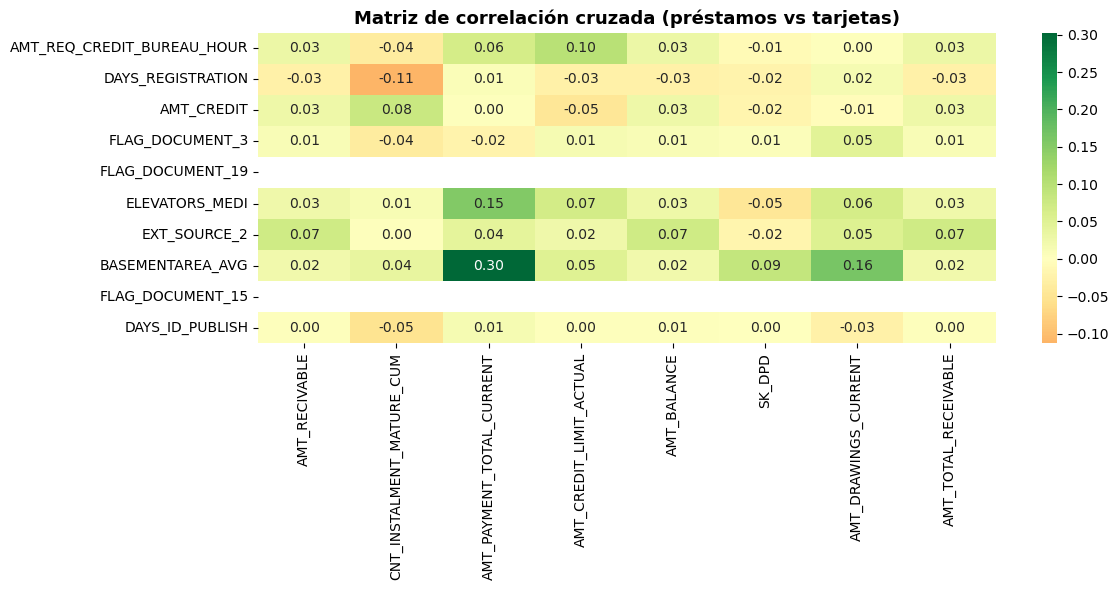

In [7]:
# === Paso 4 (corregido): buscar correlaciones cruzadas semánticas ===
if "SK_ID_CURR" in loan.columns and "SK_ID_CURR" in credit.columns:
    # ✅ Solo columnas numéricas
    credit_num = credit.select_dtypes(include=[np.number])
    
    # Agregación por cliente (promedios)
    credit_agg = credit_num.groupby("SK_ID_CURR").mean().reset_index()

    # Fusionar con el dataset de préstamos
    merged = pd.merge(loan, credit_agg, on="SK_ID_CURR", how="inner")
    print(f"\n🔗 Clientes comunes reales: {len(merged)}")

    # Seleccionar columnas numéricas representativas
    num_cols_loan = loan.select_dtypes(include=[np.number]).columns
    num_cols_credit = [c for c in credit_agg.columns if c != "SK_ID_CURR"]

    # Muestras aleatorias de ambas fuentes (para visualizar correlaciones cruzadas)
    np.random.seed(42)
    muestra_cols_loan = np.random.choice(num_cols_loan, min(10, len(num_cols_loan)), replace=False)
    muestra_cols_credit = np.random.choice(num_cols_credit, min(8, len(num_cols_credit)), replace=False)

    muestra_corr = merged[list(muestra_cols_loan) + list(muestra_cols_credit)]
    corr = muestra_corr.corr().iloc[:len(muestra_cols_loan), len(muestra_cols_loan):]

    # Heatmap de correlaciones cruzadas
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 6))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdYlGn", center=0)
    plt.title("Matriz de correlación cruzada (préstamos vs tarjetas)", fontsize=13, fontweight="bold")
    plt.tight_layout()
    plt.show()
else:
    print("\n⚠ No se encontró SK_ID_CURR en ambos datasets para correlaciones cruzadas.")


In [8]:
import pandas as pd
import numpy as np

# Cargar datasets
loan = pd.read_csv("data/data/application_train.csv", nrows=20000)
credit = pd.read_csv("data/data/credit_card_balance.csv", nrows=20000)

# Agrupar crédito por cliente (solo numéricas)
credit_num = credit.select_dtypes(include=[np.number])
credit_agg = credit_num.groupby("SK_ID_CURR").mean().reset_index()

# Fusionar por cliente
merged = pd.merge(loan, credit_agg, on="SK_ID_CURR", how="inner")

# ✅ Filtrar solo columnas numéricas
merged_num = merged.select_dtypes(include=[np.number])

# Calcular correlaciones absolutas
corr_matrix = merged_num.corr().abs()

# Identificar columnas de cada fuente
loan_cols = [c for c in loan.select_dtypes(include=[np.number]).columns if c != "SK_ID_CURR"]
credit_cols = [c for c in credit_agg.columns if c != "SK_ID_CURR"]

# Extraer pares con correlación >= 0.3
corr_pairs = []
for lcol in loan_cols:
    for ccol in credit_cols:
        if lcol in corr_matrix.index and ccol in corr_matrix.columns:
            val = corr_matrix.loc[lcol, ccol]
            if abs(val) >= 0.3:
                corr_pairs.append((lcol, ccol, val))

corr_df = pd.DataFrame(corr_pairs, columns=["Variable_loan", "Variable_credit", "Correlación"])
corr_df = corr_df.sort_values("Correlación", ascending=False)

print(f"\nVariables con correlación |r| ≥ 0.3: {len(corr_df)}")
display(corr_df.head(15))

# --- Crear tabla puente solo con esas columnas ---
selected_loan = corr_df["Variable_loan"].unique().tolist()
selected_credit = corr_df["Variable_credit"].unique().tolist()

bridge = merged[["SK_ID_CURR"] + selected_loan + selected_credit]
bridge.to_csv("data/data/tabla_puente_correlacion.csv", index=False)
print(f"\n✅ Guardado: data/data/tabla_puente_correlacion.csv con {bridge.shape[1]} columnas.")



Variables con correlación |r| ≥ 0.3: 56


,Variable_loan,Variable_credit,Correlación
18,NONLIVINGAPARTMENTS_AVG,CNT_DRAWINGS_POS_CURRENT,0.647295
55,NONLIVINGAPARTMENTS_MEDI,CNT_DRAWINGS_POS_CURRENT,0.646416
36,NONLIVINGAPARTMENTS_MODE,CNT_DRAWINGS_POS_CURRENT,0.646319
15,NONLIVINGAPARTMENTS_AVG,AMT_PAYMENT_CURRENT,0.591786
16,NONLIVINGAPARTMENTS_AVG,AMT_PAYMENT_TOTAL_CURRENT,0.591096
34,NONLIVINGAPARTMENTS_MODE,AMT_PAYMENT_TOTAL_CURRENT,0.590816
52,NONLIVINGAPARTMENTS_MEDI,AMT_PAYMENT_CURRENT,0.590577
33,NONLIVINGAPARTMENTS_MODE,AMT_PAYMENT_CURRENT,0.590284
53,NONLIVINGAPARTMENTS_MEDI,AMT_PAYMENT_TOTAL_CURRENT,0.589910
14,NONLIVINGAPARTMENTS_AVG,AMT_DRAWINGS_POS_CURRENT,0.545535



✅ Guardado: data/data/tabla_puente_correlacion.csv con 21 columnas.


In [21]:
bridge = pd.read_csv("data/data/tabla_puente_correlacion.csv")
print(bridge.shape)
bridge.head()


(944, 21)


,SK_ID_CURR,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,COMMONAREA_MODE,COMMONAREA_AVG,COMMONAREA_MEDI,LIVINGAPARTMENTS_MODE,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MEDI,...,BASEMENTAREA_MODE,BASEMENTAREA_AVG,LIVINGAREA_AVG,LIVINGAREA_MEDI,CNT_DRAWINGS_POS_CURRENT,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_DRAWINGS_POS_CURRENT,CNT_DRAWINGS_CURRENT,AMT_DRAWINGS_CURRENT
0,100048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,1458.270,1458.27,0.0,1.0,27000.0
1,100059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.2585,0.2491,0.5878,0.5983,NaN,NaN,0.00,NaN,0.0,0.0
2,100082,0.0,0.0,0.0,0.0086,0.0085,0.0086,0.0643,0.0588,0.0599,...,0.0505,0.0487,0.0505,0.0514,0.0,69.390,0.00,0.0,0.0,0.0
3,100086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,414.540,0.00,0.0,0.0,0.0
4,100100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,483.345,0.00,0.0,0.0,0.0


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(
    bridge[["NONLIVINGAPARTMENTS_AVG", "AMT_PAYMENT_TOTAL_CURRENT", 
            "CNT_DRAWINGS_POS_CURRENT", "AMT_CREDIT_LIMIT_ACTUAL"]],
    diag_kind="kde"
)
plt.suptitle("Relaciones préstamo–tarjeta más correlacionadas", y=1.02)
plt.show()


KeyError: "['AMT_CREDIT_LIMIT_ACTUAL'] not in index"

In [24]:
print("Columnas en tabla puente:")
print(bridge.columns.tolist())


Columnas en tabla puente:
['SK_ID_CURR', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MODE', 'COMMONAREA_MODE', 'COMMONAREA_AVG', 'COMMONAREA_MEDI', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_MODE', 'BASEMENTAREA_AVG', 'LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'CNT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'CNT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_CURRENT', 'RISK_INDEX', 'RISK_INDEX_NORMALIZED']


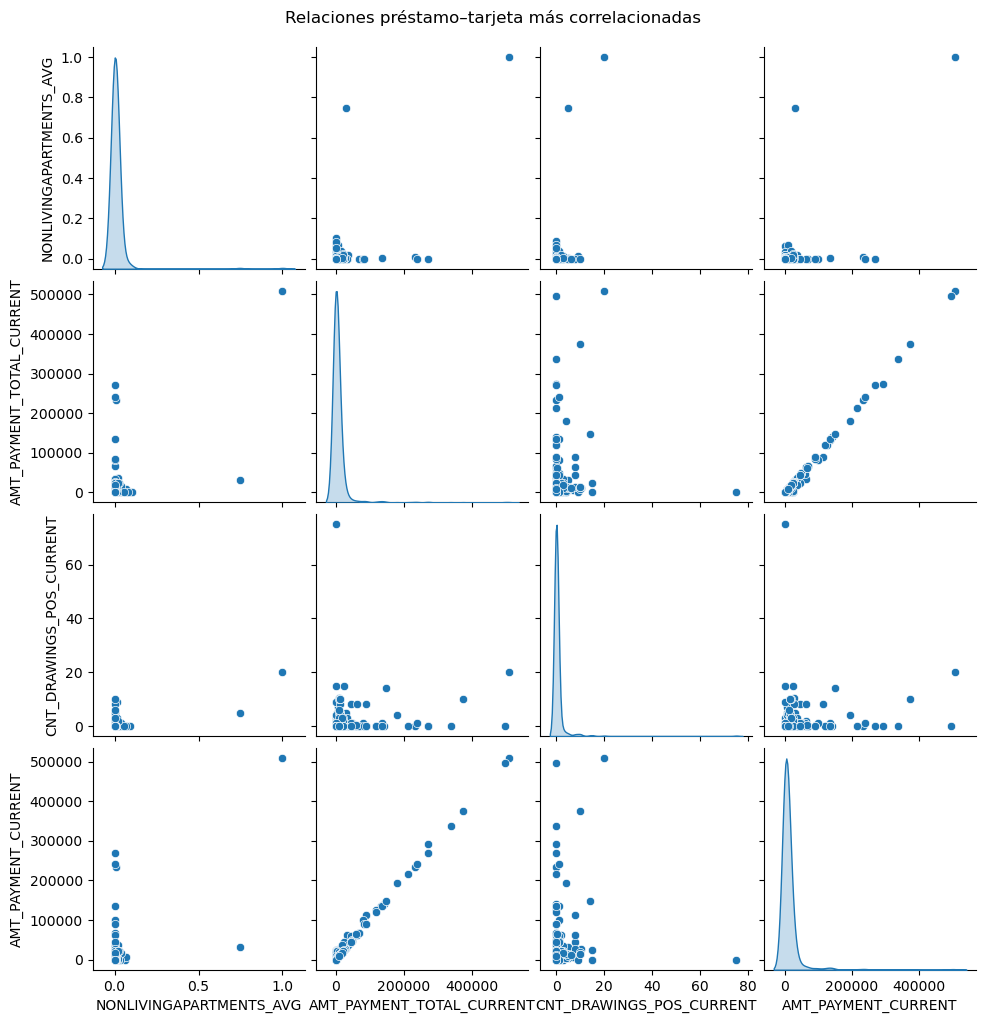

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Verifica y ajusta nombres reales
cols = ["NONLIVINGAPARTMENTS_AVG", "AMT_PAYMENT_TOTAL_CURRENT", 
        "CNT_DRAWINGS_POS_CURRENT", "AMT_PAYMENT_CURRENT"]

sns.pairplot(
    bridge[cols],
    diag_kind="kde"
)
plt.suptitle("Relaciones préstamo–tarjeta más correlacionadas", y=1.02)
plt.show()


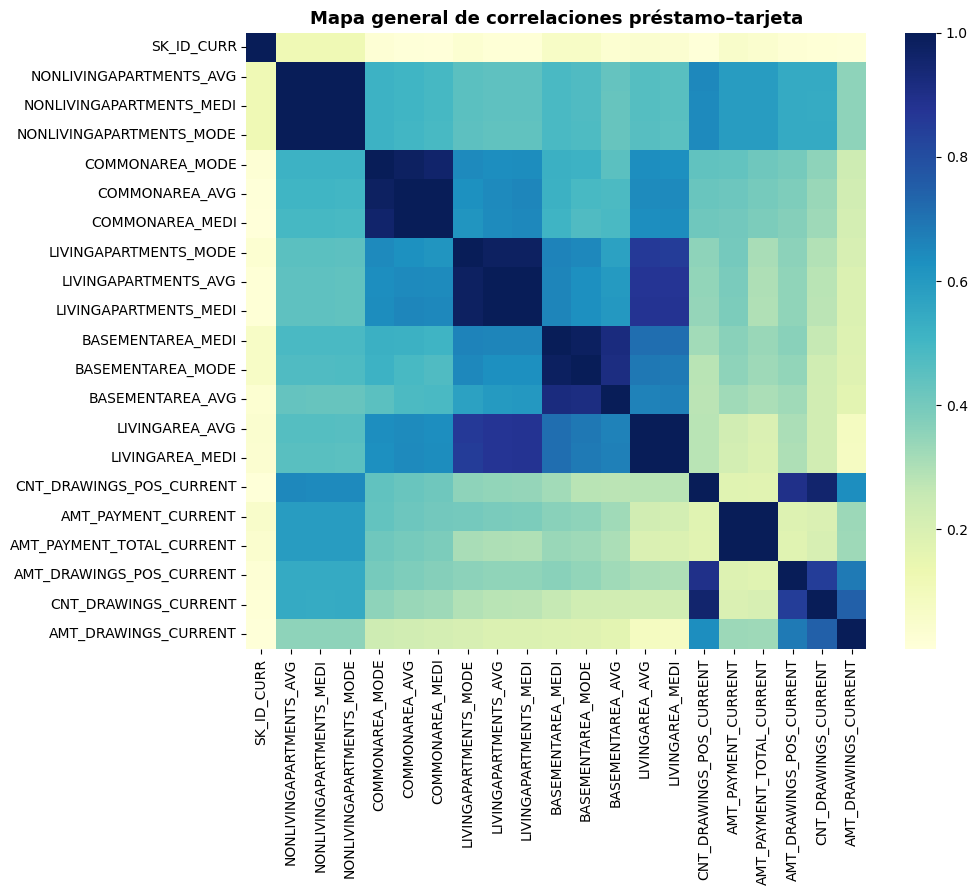

In [11]:
corr_bridge = bridge.corr().abs()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_bridge, cmap="YlGnBu", annot=False)
plt.title("Mapa general de correlaciones préstamo–tarjeta", fontsize=13, fontweight="bold")
plt.show()


In [27]:
bridge["RISK_INDEX"] = (
    bridge["NONLIVINGAPARTMENTS_AVG"].fillna(0) * 0.4 +
    bridge["AMT_PAYMENT_TOTAL_CURRENT"].fillna(0) * 0.3 +
    bridge["CNT_DRAWINGS_POS_CURRENT"].fillna(0) * 0.3
)
bridge["RISK_INDEX_NORMALIZED"] = (bridge["RISK_INDEX"] - bridge["RISK_INDEX"].min()) / \
                                  (bridge["RISK_INDEX"].max() - bridge["RISK_INDEX"].min())
